<table style="width: 100%">
    <tr style="background: #ffffff">
        <td style="padding-top:25px;width: 180px"><img src="https://mci.edu/templates/mci/images/logo.svg" alt="Logo"></td>
        <td style="width: 100%">
            <div style="text-align:right; width: 100%; text-align:right"><font style="font-size:38px"><b>Data Science</b></font></div>
            <div style="padding-top:0px; width: 100%; text-align:right"><font size="4"><b>WS 2022</b></font></div>
        </td>
    </tr>
</table>

---

# 8 Unsupervised Learning

Unsupervised learning is an important tool, to make sense from high-dimensional data (e.g., gene expression data). In this norebook, You will learn to apply Prinical Component Analysis and Uniform Manifold Approximation to get insights from high dimensional data.

No only, will we use this to plot the data for visual analytics, but we will also learn how to use the new (reduced) dimensions as input for a supervised classification problem.

### Prinical Component Analysis

The PCA transforms the data, by fitting principal components by trying to reduce variance in the data with as few new components (features) as possible.

#### Data Preparation

To understand what happens, we apply the PCA to the penguine data set.

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

penguins = sns.load_dataset("penguins")
penguins_cleaned = penguins.dropna()
penguins_cleaned

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


#### Data Understanding

In the data set, we  have four different interval scaled variables that are possible predictors for the species. We forget all other variables for this use case, as interval scaled variables are easier to make sense of in terms of a PCA.

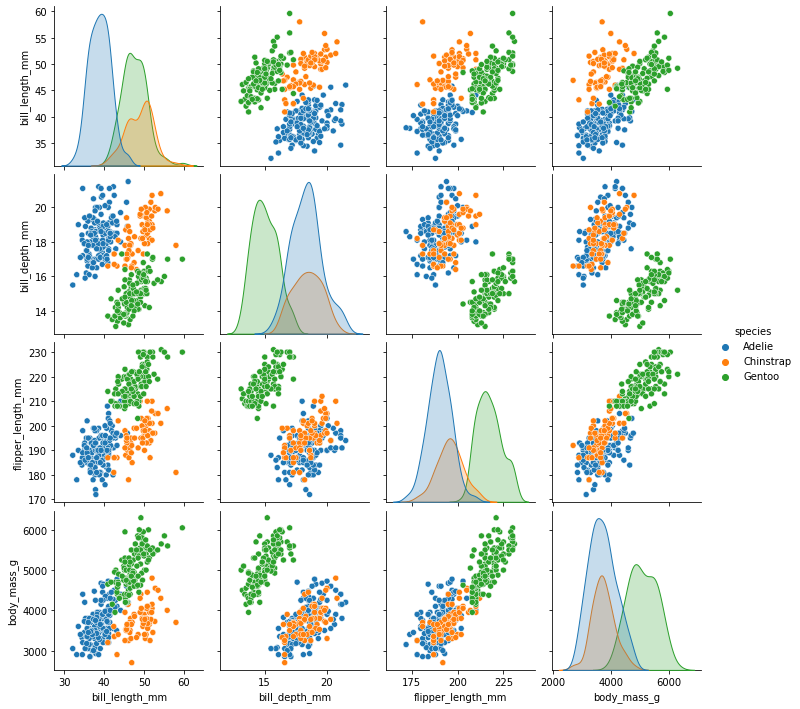

In [ ]:
# Pair Plot below helps us understand the relationship between all the features.
sns.pairplot(penguins_cleaned,hue='species')
plt.show()

**We** scale the data, before clustering, because they are different in nature and scale.

It is good practise, to scale the data before conducting a PCA. As the PCA is based on the variance in the variables. Variables on a larger scale have larger variance values and would hence have a larger influence on the PCA composition.

We keep the species, even as we do not use it the the PCA tranformation. This helps us to keep track in the plots how our data changes.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Selecting the variables we want to keep
features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Separating out the features
x = penguins_cleaned.loc[:, features]#.values

# Separating out the target
y = penguins_cleaned.loc[:,['species']]#.values

# Standardizing the features
x[x.columns] = StandardScaler().fit_transform(x)

We see that the scaling did not change much about the data, as the scatter plots look very similar than they did before.

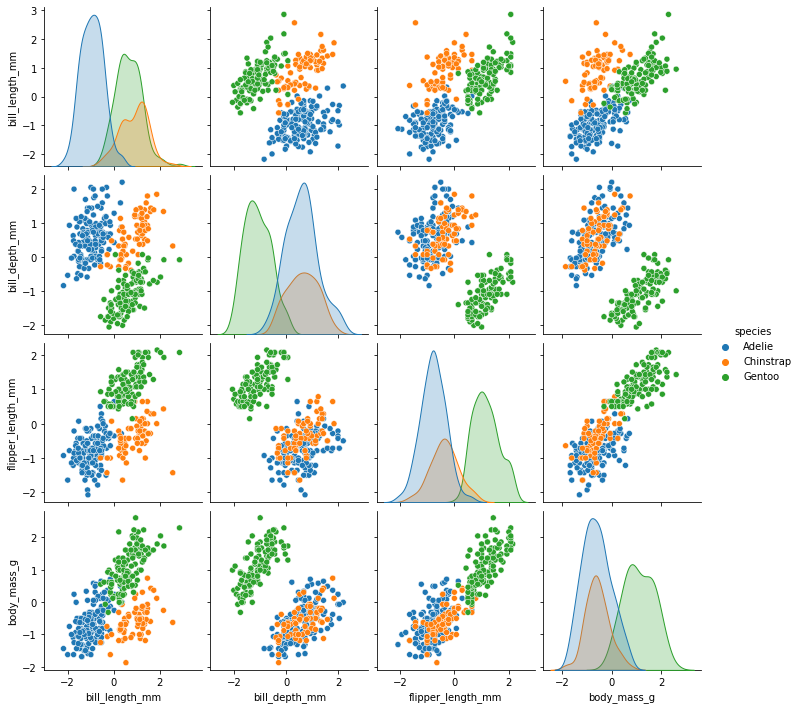

In [ ]:
# Pair Plot below helps us understand the relationship between all the features.

plot_data = x.copy()
plot_data["species"] = y
sns.pairplot(plot_data,hue='species')
plt.show()

#### Calculating the PCA

sklearn provides an PCA-function. We can pass the number of components we want as a parameter. The function returns an array with the principle component valuws for each observation.

For now, we only focus on two features ('flipper_length_mm', 'body_mass_g'). In the scatter plot above, You can see that the distribution follows a linear trend.

In [ ]:
x_only_two_features = x[['flipper_length_mm', 'body_mass_g']]

We can use the `PCA()`model, that works like a scaler, we used above. The only parameter we have to pass is the number of components `n_components`. The `fit_transform()` function returns an array with the new components as columns.

In [ ]:
# Load the PCA
from sklearn.decomposition import PCA

# Define the PCA with number of performance
pca = PCA(n_components=2)

# Fit the PCA
principalComponents = pca.fit_transform(x_only_two_features)

# Create a DataFrame with the results
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [ ]:
principalDf

,principal component 1,principal component 2
0,-1.410838,0.606893
1,-1.114230,0.398234
2,-1.143204,-0.540221
3,-1.068361,-0.263271
4,-1.044045,0.064205
...,...,...
328,1.289933,-0.027100
329,1.274499,-0.143588
330,2.419717,0.294256
331,1.430736,0.315810


Note, the data now only has two variables (principal component 1 and 2). 

In [ ]:
principalDf.head()

,principal component 1,principal component 2
0,-1.410838,0.606893
1,-1.114230,0.398234
2,-1.143204,-0.540221
3,-1.068361,-0.263271
4,-1.044045,0.064205


#### Plotting the PCA

Next, we plot the results of the PCA. Note, that we will add the label (species) to understand what happend during the process. Often, You will not have any labels.

In [ ]:
# Here, we a  the predictor variable again, to ensure we can evalaute the results
finalDf = pd.concat([principalDf, penguins_cleaned[['species']]], axis = 1)

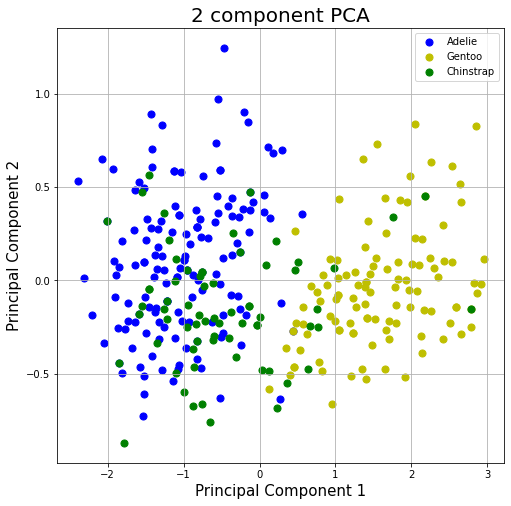

In [ ]:
# Here, we create a scatterplot based on the two principla components. 
# We also add the species, to see whether the two components help in structuring the data
# PC1 does a good job in sorting out Gentoo, however Adelie and Chinstrap overlap very much

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Adelie', 'Gentoo', 'Chinstrap']
colors = ['b', 'y', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['species'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

We can see that the plot of the first two components looks similar to a tilted version on the scatterplot of 'flipper_length_mm' and 'body_mass_g' above. The axis of the first component is the slope in the original diagram (direction of the highest variance in the data).

Let's assume, that we do not have the label (species) and all the dots have the same color. We would still clearly see, that there are at least two distinctive groups in the data.

#### Explained Variance of the PCA

Remember, that the first component was the direction with the highest variance in the data. By adding the component, we explained some of the variance in the data. The more components we add, the more variance the new components of the PCA can explain. However, every new component explains less variance than the one before. 

Often, we want only two principal components, as we aim for a plot that is easy to interpret. Sometimes however, we want to reduce hundreds of variables to a hand full, for instance to use the principal components as predictors in a classification model.

If we want more than two componentens, we have to decide how many. A common way to decide for the number of components it to all components until a certain amount of variance in the data is exlained. We can find them usind the `PCA()`function:

In [ ]:
# If we omit the n_components, the pca is conducted with several
# n is limited by the number of features in the input 
pca = PCA()
principalComponents = pca.fit_transform(x)

# Print how much variance each component explains
pca.explained_variance_ratio_ 

array([0.68633893, 0.19452929, 0.09216063, 0.02697115])

The outcome means, that the first component accounts for 68,6 % of variance in the data, while the next only attributes 19.5 %.

Next, we create a plot to show when to stop with adding components, when we want to explain a vertain amount of the variance:

3 features explain around 90% of the variance.


<BarContainer object of 3 artists>

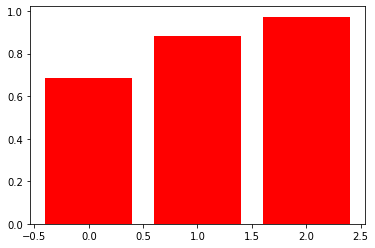

In [ ]:
# Fitting the PCA
pca = PCA()
pca.fit_transform(x)

# Variance explained using all principal components
total = sum(pca.explained_variance_)

# Variable to loop over the number of components
k = 0

# Variable to store the cumulated variance of the k fist components
current_variance = 0

# Loop until k variables expain 90% of the variance
while current_variance/total < 0.90:

    # add to the cumulated variance
    current_variance = current_variance +  pca.explained_variance_[k]

    # Increment the counter    
    k = k + 1
    
# Print results
print(k, " features explain around 90% of the variance.", sep='')

# Perform PCA with the number of components that explain 90%
pca = PCA(n_components=k)
X_pca = pca.fit_transform(x)

# Plot the results
var_exp = pca.explained_variance_ratio_.cumsum()
plt.bar(range(k), var_exp,color = 'r')

✍️ How many components do we need, to explain 80 % of the variance in the data?

In [ ]:
#@title ❓ Click `Show code` in the code cell to show the solution. { display-mode: "form" }

# In the bar plot, we see hat with two components, we already explain more than 80% of the variance

# 🏁 Recap

- If you have finished the tasks and have no questions, place the green card on top.
- If you have finished the tasks but would like to discuss the solutions together again, place the yellow card on top.

![](https://www.lokalinfo.ch/fileadmin/news_import/image003_03.jpg)

## Uniform Manifold Approximation and Projection

UMAP is a novel algorithm similar to a PCA, that has the benefit of keeping the local distance between observations (cluster) while reducing the dimensionality of the data.

Luckily, we can use UMAP in the same way, we use PCA. All we have to do is to install the  `umap-learn` package:

In [ ]:
# Installing UMAP
!pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Loading UMAP
import umap.umap_ as umap

Instead of the PCA, we now load a UMAP dimension reducer. The UMAP method has different optional [parameters](https://umap-learn.readthedocs.io/en/latest/parameters.html) You can play around with in the future. 
Basically, UMAP works just like any other scaler or transformer we used so far:

In [ ]:
# Defining the UMAP transformer without additional parameters
umap_reducer = umap.UMAP()

#### Data Preparation

We reload the data an scale the variables again:

In [ ]:
# Using for predictor variables
penguin_data = penguins_cleaned[
    [
        "bill_length_mm",
        "bill_depth_mm",
        "flipper_length_mm",
        "body_mass_g",
    ]
].values

# Standardizing the data
scaled_penguin_data = StandardScaler().fit_transform(penguin_data)
scaled_penguin_data

array([[-0.89604189,  0.7807321 , -1.42675157, -0.56847478],
       [-0.82278787,  0.11958397, -1.06947358, -0.50628618],
       [-0.67627982,  0.42472926, -0.42637319, -1.1903608 ],
       ...,
       [ 1.17338426, -0.74499437,  1.50292796,  1.91906927],
       [ 0.22108196, -1.20271231,  0.78837197,  1.23499466],
       [ 1.08181673, -0.54156417,  0.85982757,  1.48374906]])

#### Calculating UMAP

The `umap` function works just like the PCA or any other scaler, we used so far:

In [ ]:
# We use the umap_reducer, we define above to fit and transform the data
umap_transformed_data = umap_reducer.fit_transform(scaled_penguin_data)
# This results in a new matrix with two columns for the two umap dimensions
print(umap_transformed_data.shape)

(333, 2)


We can plot the results in a scatter plot:

Text(0.5, 1.0, 'UMAP projection of the Penguin dataset')

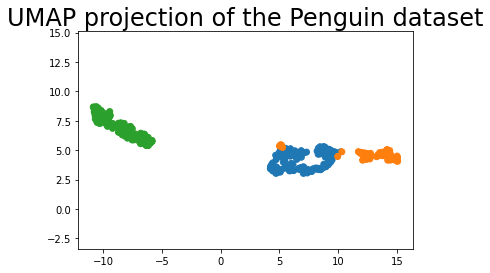

In [ ]:
plt.scatter(
    umap_transformed_data[:, 0],
    umap_transformed_data[:, 1],
    c=[sns.color_palette()[x] for x in penguins_cleaned.species.map({"Adelie":0, "Chinstrap":1, "Gentoo":2})]
)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Penguin dataset', fontsize=24)

We see, that the umap does a pretty good job in seperating the data.

Note, that we did not use the label (species), when we created the UMAP data. We only reapplied it for the plots. Here, we see that the individuals of one species - which are similiar - cluster more closely than they did with a PCA.

Let's assume, that we do not have the label (species) and all the dots have the same color. We would still clearly see, that there are at least two distinctive groups in the data. We also, see that there is somethin special about the right culster (that looks like a pan with a panhandle). Se we could conclude, that there are two, more likely three types of data points.



# 🏁 Recap

- If you have finished the tasks and have no questions, place the green card on top.
- If you have finished the tasks but would like to discuss the solutions together again, place the yellow card on top.

![](https://www.lokalinfo.ch/fileadmin/news_import/image003_03.jpg)

## 🏆 High Dimensional Data

Next, we will work with a real world data-set with thousands of variables. 

This dataset comes from a proof-of-concept study published in 1999 by Golub et al. It showed how new cases of cancer could be classified by gene expression monitoring (via DNA microarray) and thereby provided a general approach for identifying new cancer classes and assigning tumors to known classes. These data were used to classify patients with *acute myeloid leukemia (AML)* and *acute lymphoblastic leukemia (ALL)* based on the expressions of genes.

There are two datasets containing the initial (training-set, 38 samples) and independent (test-set, 34 samples) datasets used in the paper. These datasets contain measurements corresponding to *ALL*  and *AML* samples from bone marrow and peripheral blood. Intensity (comparable to read count) values have been re-scaled such that overall intensities for each chip are equivalent.

Acknowledgements: 
- T.R. Golub, D.K. Slonim, P. Tamayo, C. Huard, M. Gaasenbeek, J.P. Mesirov, H. Coller, M. Loh, J.R. Downing, M.A. Caligiuri, C.D. Bloomfield, and E.S. Lander: Molecular Classification of Cancer: Class Discovery and Class Prediction by Gene Expression. Science 286:531-537. (1999). Published: 1999.10.14



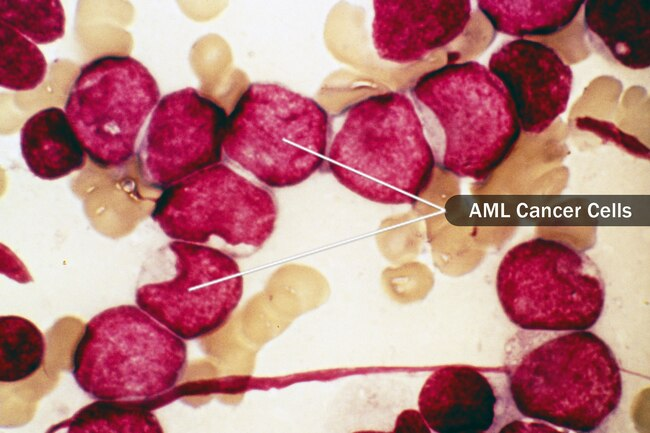

These datasets have been converted to a comma separated value files (CSV) You can find in [Sakai](https://sakai.mci4me.at/portal).

As there are hundreds of genes in the data set. It is hard to train a reasonable model with so few observations. Hence, we will preprocess the data with dimensionality reduction.

In particualr, we will cover the following the following tasks:
- Find out how many genes are analyzed in the data set?
- Use UMAP und PCA (n=2) to cluster the data
- Create a plot of both. Do you see any pattern?
- How many Principal Components are needed to explain 90% of variance in the data?
- Use these Principal Components to train a classififer that predicts the cancer type
- Plot the classifiers confusion matrix and ROC-Curve


### Data Preparation


First, You will have to upload the data (*.csv-files from Sakai) into the Notebook.

Click on the folder-symbol on the left and than on the up arrow to upload new files.

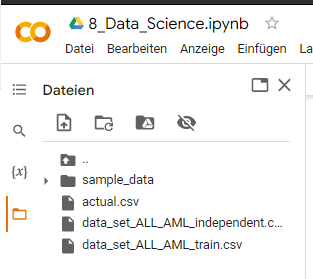


In [ ]:
# Importing the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# After the upload You will be able to load each of the files into a DataFrame
# Load dataset
Train_Data = pd.read_csv("data_set_ALL_AML_train.csv")
Test_Data = pd.read_csv("data_set_ALL_AML_independent.csv")
labels = pd.read_csv("actual.csv", index_col = 'patient')

### Data Understanding

✍️ **Task**

Given the shape and the header of the training DataFrame and knowing that we have 37 patients. 
- How many genes do we have? 
- What is the meaning of the columns? 
- Whats in the cells of the Data frame?
- What kind of cancer does patient 50 have?


In [ ]:
#@title ❓ Click `Show code` in the code cell to show the solution. { display-mode: "form" }
print(Train_Data.shape)
Train_Data.head()

(7129, 78)


,Gene Description,Gene Accession Number,1,call,2,call.1,3,call.2,4,call.3,...,29,call.33,30,call.34,31,call.35,32,call.36,33,call.37
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-214,A,-139,A,-76,A,-135,A,...,15,A,-318,A,-32,A,-124,A,-135,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-153,A,-73,A,-49,A,-114,A,...,-114,A,-192,A,-49,A,-79,A,-186,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,-58,A,-1,A,-307,A,265,A,...,2,A,-95,A,49,A,-37,A,-70,A
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,88,A,283,A,309,A,12,A,...,193,A,312,A,230,P,330,A,337,A
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-295,A,-264,A,-376,A,-419,A,...,-51,A,-139,A,-367,A,-188,A,-407,A


In [ ]:
#@title ❓ Click `Show code` in the code cell to show the solution. { display-mode: "form" }
Train_Data.columns

Index(['Gene Description', 'Gene Accession Number', '1', 'call', '2', 'call.1',
       '3', 'call.2', '4', 'call.3', '5', 'call.4', '6', 'call.5', '7',
       'call.6', '8', 'call.7', '9', 'call.8', '10', 'call.9', '11', 'call.10',
       '12', 'call.11', '13', 'call.12', '14', 'call.13', '15', 'call.14',
       '16', 'call.15', '17', 'call.16', '18', 'call.17', '19', 'call.18',
       '20', 'call.19', '21', 'call.20', '22', 'call.21', '23', 'call.22',
       '24', 'call.23', '25', 'call.24', '26', 'call.25', '27', 'call.26',
       '34', 'call.27', '35', 'call.28', '36', 'call.29', '37', 'call.30',
       '38', 'call.31', '28', 'call.32', '29', 'call.33', '30', 'call.34',
       '31', 'call.35', '32', 'call.36', '33', 'call.37'],
      dtype='object')

In [ ]:
#@title ❓ Click `Show code` in the code cell to show the solution. { display-mode: "form" }
print(Test_Data.shape)
Test_Data.head()
#Test_Data.columns

(7129, 70)


,Gene Description,Gene Accession Number,39,call,40,call.1,42,call.2,47,call.3,...,65,call.29,66,call.30,63,call.31,64,call.32,62,call.33
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-342,A,-87,A,22,A,-243,A,...,-62,A,-58,A,-161,A,-48,A,-176,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-200,A,-248,A,-153,A,-218,A,...,-198,A,-217,A,-215,A,-531,A,-284,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,41,A,262,A,17,A,-163,A,...,-5,A,63,A,-46,A,-124,A,-81,A
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,328,A,295,A,276,A,182,A,...,141,A,95,A,146,A,431,A,9,A
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-224,A,-226,A,-211,A,-289,A,...,-256,A,-191,A,-172,A,-496,A,-294,A


In [ ]:
#@title ❓ Click `Show code` in the code cell to show the solution. { display-mode: "form" }

# Looking at the training data, we can see, that are $7129$ rows with Gene Descriptions. For each of them, we have an [Accession number ](https://en.wikipedia.org/wiki/Accession_number_(bioinformatics) which is an unique ID.
# We also see, that we have $38 \times 2$ colums for $38$ patients. The column with the integer of the patient number (1, 2, ...) is the gene expression value. The call columns contain: Present, Absent, and Marginal. 
# This is a detection call by the manufacturer of the DNA Microarray used in the paper. (These values are related to p-values of intensity calls compared to a cutoff noise frequency it seems...). Therefore it seems best to exclude rows where all values are Absent(A) calls, i.e. untrustworthy calls. Take note, that in the original data, the call columns have no number, but it is created at the csv-import. Hence, the numers do not correspondent to the patient id.


In [ ]:
#@title ❓ Click `Show code` in the code cell to show the solution. { display-mode: "form" }

print(labels.shape)
labels.head()

(72, 1)


,cancer
patient,
1,ALL
2,ALL
3,ALL
4,ALL
5,ALL


In [ ]:
#@title ❓ Click `Show code` in the code cell to show the solution. { display-mode: "form" }
# Patient 50 has  acute myeloid leukemia 
labels[labels.index == 50]

,cancer
patient,
50,AML


### Data Preparation

First, we want to create a clean data set. We join the training and test set, we downloaded into on data set `df_all`. 

In [ ]:
# We put both data sets below each other
df_all = pd.concat([Train_Data, Test_Data], axis = 1)

# First, we have to rename all duplicate column names
df_all.columns = pd.io.parsers.base_parser.ParserBase({'names':df_all.columns, 'usecols':None})._maybe_dedup_names(df_all.columns)
df_all = df_all.drop(labels=['Gene Accession Number.1', 'Gene Description.1'], axis = 1)

# This is the resulting dataframe
df_all.head()

,Gene Description,Gene Accession Number,1,call,2,call.1,3,call.2,4,call.3,...,65,call.29.1,66,call.30.1,63,call.31.1,64,call.32.1,62,call.33.1
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-214,A,-139,A,-76,A,-135,A,...,-62,A,-58,A,-161,A,-48,A,-176,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-153,A,-73,A,-49,A,-114,A,...,-198,A,-217,A,-215,A,-531,A,-284,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,-58,A,-1,A,-307,A,265,A,...,-5,A,63,A,-46,A,-124,A,-81,A
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,88,A,283,A,309,A,12,A,...,141,A,95,A,146,A,431,A,9,A
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-295,A,-264,A,-376,A,-419,A,...,-256,A,-191,A,-172,A,-496,A,-294,A


First, we remove all Genes (rows), where all the observations (for all patients) are tagged with "A" that indicate bad data quality. 

In [ ]:
# We create a list with all column names hat include "call"
cols = [col for col in df_all.columns if 'call' in col]

# We find all rows, where all call columns only have "A"s
conditional = df_all.T.filter(items = cols, axis=0).apply(lambda x: x == 'A', axis=0).all()

# We remove those columns
df_all = df_all.loc[~conditional,:]

df_all

,Gene Description,Gene Accession Number,1,call,2,call.1,3,call.2,4,call.3,...,65,call.29.1,66,call.30.1,63,call.31.1,64,call.32.1,62,call.33.1
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,88,A,283,A,309,A,12,A,...,141,A,95,A,146,A,431,A,9,A
18,hum_alu_at (miscellaneous control),hum_alu_at,15091,P,11038,P,16692,P,15763,P,...,22818,P,39323,P,15689,P,41570,P,39538,P
19,AFFX-DapX-5_at (endogenous control),AFFX-DapX-5_at,7,A,37,A,183,A,45,A,...,2,A,-26,A,6,A,94,A,-104,A
20,AFFX-DapX-M_at (endogenous control),AFFX-DapX-M_at,311,A,134,A,378,A,268,A,...,46,A,73,A,302,A,235,A,101,A
22,AFFX-LysX-5_at (endogenous control),AFFX-LysX-5_at,21,A,-21,A,67,A,43,A,...,26,A,39,A,25,A,27,A,106,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7124,PTGER3 Prostaglandin E receptor 3 (subtype EP3...,X83863_at,793,A,782,A,1138,A,627,A,...,707,A,423,A,809,A,466,A,551,A
7125,HMG2 High-mobility group (nonhistone chromosom...,Z17240_at,329,A,295,A,777,P,170,A,...,354,A,41,A,445,A,349,A,194,A
7126,RB1 Retinoblastoma 1 (including osteosarcoma),L49218_f_at,36,A,11,A,41,A,-50,A,...,-22,A,0,A,-2,A,0,A,20,A
7127,GB DEF = Glycophorin Sta (type A) exons 3 and ...,M71243_f_at,191,A,76,A,228,A,126,A,...,260,A,1777,P,210,A,284,A,379,A


After, we used this imformation to clean the data, we remove the call columns.

✍️ **Task** 

What patient number did the column `call.1`belong to?

In [ ]:
#@title ❓ Click `Show code` in the code cell to show the solution. { display-mode: "form" }
# Patient 2

In [ ]:
# Drop all columns, that have call in the column name
cols = [col for col in df_all.columns if 'call' in col]
df_all = df_all.drop(cols, 1)
df_all

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,Gene Description,Gene Accession Number,1,2,3,4,5,6,7,8,...,54,57,58,60,61,65,66,63,64,62
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,88,283,309,12,168,71,55,-2,...,319,178,340,31,396,141,95,146,431,9
18,hum_alu_at (miscellaneous control),hum_alu_at,15091,11038,16692,15763,18128,34207,30801,25147,...,31068,38690,58203,31022,36915,22818,39323,15689,41570,39538
19,AFFX-DapX-5_at (endogenous control),AFFX-DapX-5_at,7,37,183,45,-28,65,43,338,...,-23,-102,-111,-76,62,2,-26,6,94,-104
20,AFFX-DapX-M_at (endogenous control),AFFX-DapX-M_at,311,134,378,268,118,154,80,269,...,163,104,61,133,149,46,73,302,235,101
22,AFFX-LysX-5_at (endogenous control),AFFX-LysX-5_at,21,-21,67,43,-8,-24,-8,46,...,70,62,-71,25,-17,26,39,25,27,106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7124,PTGER3 Prostaglandin E receptor 3 (subtype EP3...,X83863_at,793,782,1138,627,250,645,1140,1799,...,618,507,1372,87,1111,707,423,809,466,551
7125,HMG2 High-mobility group (nonhistone chromosom...,Z17240_at,329,295,777,170,314,341,482,446,...,308,64,642,98,459,354,41,445,349,194
7126,RB1 Retinoblastoma 1 (including osteosarcoma),L49218_f_at,36,11,41,-50,14,26,10,59,...,0,-11,-9,-26,-8,-22,0,-2,0,20
7127,GB DEF = Glycophorin Sta (type A) exons 3 and ...,M71243_f_at,191,76,228,126,56,193,369,781,...,196,198,608,153,73,260,1777,210,284,379


When, we worked with gene expression data, we usally had the genes in the rows and the samples in the columns. This is the same way, the data is structured right now.

However, in this case, we want to use the gene expression values as a pedictor for predicting the cancer type for each patient. Hence, we want to restructure the data in a way, that each row represents an observation (patient).

In [ ]:
# Store the GA-number
ga_numbers = df_all["Gene Accession Number"]

# Transpose the dataframe, so columns become rows
df_all = df_all.T

# Use the strored GA-Numbers as column names
df_all.columns = ga_numbers

# Remove the first row
df_all = df_all.iloc[2:]


In [ ]:
# We see, that the first column is labeled with Gene Accession Number	but holds the patient id
df_all.index

Index(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25',
       '26', '27', '34', '35', '36', '37', '38', '28', '29', '30', '31', '32',
       '33', '39', '40', '42', '47', '48', '49', '41', '43', '44', '45', '46',
       '70', '71', '72', '68', '69', '67', '55', '56', '59', '52', '53', '51',
       '50', '54', '57', '58', '60', '61', '65', '66', '63', '64', '62'],
      dtype='object')

In [ ]:
# We create a new colums for the patient id
df_all["patient"] = df_all.index.astype(int) 
df_all

Gene Accession Number,AFFX-BioC-5_at,hum_alu_at,AFFX-DapX-5_at,AFFX-DapX-M_at,AFFX-LysX-5_at,AFFX-HUMISGF3A/M97935_MA_at,AFFX-HUMISGF3A/M97935_MB_at,AFFX-HUMISGF3A/M97935_3_at,AFFX-HUMRGE/M10098_5_at,AFFX-HUMRGE/M10098_M_at,...,U29175_at,U48730_at,U58516_at,X06956_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at,patient
1,88,15091,7,311,21,-13,215,797,14538,9738,...,1582,185,511,389,793,329,36,191,-37,1
2,283,11038,37,134,-21,-219,116,433,615,115,...,624,169,837,442,782,295,11,76,-14,2
3,309,16692,183,378,67,104,476,1474,5669,3272,...,753,315,1199,168,1138,777,41,228,-41,3
4,12,15763,45,268,43,-148,155,415,4850,2293,...,743,240,835,174,627,170,-50,126,-91,4
5,168,18128,-28,118,-8,-55,122,483,1284,2731,...,626,156,649,504,250,314,14,56,-25,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,141,22818,2,46,26,-203,25,264,104,-159,...,588,92,532,239,707,354,-22,260,5,65
66,95,39323,-26,73,39,-60,60,306,569,478,...,669,63,297,358,423,41,0,1777,-49,66
63,146,15689,6,302,25,-209,183,657,3762,2164,...,745,130,639,548,809,445,-2,210,16,63
64,431,41570,94,235,27,-626,-249,477,-159,-745,...,878,84,1141,197,466,349,0,284,-73,64


Next, we want to add the predcited variable (cancer type) to the DataFrame. We cast the cancer label to a category and create a common DataFrame (`data`) which hold predcited variables and predictors:

In [ ]:
# Changing the datatype to category
labels["cancer"]= labels["cancer"].astype("category")


# add the cancer column to train data
data = pd.merge(df_all, labels, on="patient")

We finally have, a DataFrame, with all the data and the labels. 

In [ ]:
data.head()

,AFFX-BioC-5_at,hum_alu_at,AFFX-DapX-5_at,AFFX-DapX-M_at,AFFX-LysX-5_at,AFFX-HUMISGF3A/M97935_MA_at,AFFX-HUMISGF3A/M97935_MB_at,AFFX-HUMISGF3A/M97935_3_at,AFFX-HUMRGE/M10098_5_at,AFFX-HUMRGE/M10098_M_at,...,U48730_at,U58516_at,X06956_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at,patient,cancer
0,88,15091,7,311,21,-13,215,797,14538,9738,...,185,511,389,793,329,36,191,-37,1,ALL
1,283,11038,37,134,-21,-219,116,433,615,115,...,169,837,442,782,295,11,76,-14,2,ALL
2,309,16692,183,378,67,104,476,1474,5669,3272,...,315,1199,168,1138,777,41,228,-41,3,ALL
3,12,15763,45,268,43,-148,155,415,4850,2293,...,240,835,174,627,170,-50,126,-91,4,ALL
4,168,18128,-28,118,-8,-55,122,483,1284,2731,...,156,649,504,250,314,14,56,-25,5,ALL


✍️ **Task**

Check the new DataFrame `data` is the index (number) the same as the patient id?

In [ ]:
#@title ❓ Click `Show code` in the code cell to show the solution. { display-mode: "form" }

# Does the data fit the index?
data.patient
# No, it does not fit

In [ ]:
# Hence, we replace the original index by the patient id
data = data.set_index(data["patient"])
data

,AFFX-BioC-5_at,hum_alu_at,AFFX-DapX-5_at,AFFX-DapX-M_at,AFFX-LysX-5_at,AFFX-HUMISGF3A/M97935_MA_at,AFFX-HUMISGF3A/M97935_MB_at,AFFX-HUMISGF3A/M97935_3_at,AFFX-HUMRGE/M10098_5_at,AFFX-HUMRGE/M10098_M_at,...,U48730_at,U58516_at,X06956_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at,patient,cancer
patient,,,,,,,,,,,,,,,,,,,,,
1,88,15091,7,311,21,-13,215,797,14538,9738,...,185,511,389,793,329,36,191,-37,1,ALL
2,283,11038,37,134,-21,-219,116,433,615,115,...,169,837,442,782,295,11,76,-14,2,ALL
3,309,16692,183,378,67,104,476,1474,5669,3272,...,315,1199,168,1138,777,41,228,-41,3,ALL
4,12,15763,45,268,43,-148,155,415,4850,2293,...,240,835,174,627,170,-50,126,-91,4,ALL
5,168,18128,-28,118,-8,-55,122,483,1284,2731,...,156,649,504,250,314,14,56,-25,5,ALL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,141,22818,2,46,26,-203,25,264,104,-159,...,92,532,239,707,354,-22,260,5,65,AML
66,95,39323,-26,73,39,-60,60,306,569,478,...,63,297,358,423,41,0,1777,-49,66,AML
63,146,15689,6,302,25,-209,183,657,3762,2164,...,130,639,548,809,445,-2,210,16,63,AML


In [ ]:
# Making sure all the expression values are numeric
data.iloc[:,0:-3] = data.iloc[:,0:-3].astype("int")


In [ ]:
# Never a bad idea to store the cleaned data
data.to_csv("cleand_cancer_data.csv")

✍️ **Task**

- Is the data balanced? i.e., are there a similar number of patients for each type of cancer
- Are the expression metrics similar in scale, variance, etc?

In [ ]:
# No, the data set is not balanced, but it could be worse
data['cancer'].value_counts()

ALL    47
AML    25
Name: cancer, dtype: int64

In [ ]:
# No, the expression values are on very different scale 0 up to 58203
data.describe()

,AFFX-BioC-5_at,hum_alu_at,AFFX-DapX-5_at,AFFX-DapX-M_at,AFFX-LysX-5_at,AFFX-HUMISGF3A/M97935_MA_at,AFFX-HUMISGF3A/M97935_MB_at,AFFX-HUMISGF3A/M97935_3_at,AFFX-HUMRGE/M10098_5_at,AFFX-HUMRGE/M10098_M_at,...,M93143_at,U29175_at,U48730_at,U58516_at,X06956_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,patient
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,...,72.000000,72.000000,72.000000,72.00000,72.000000,72.000000,72.000000,72.000000,72.000000,72.00000
mean,189.347222,25209.180556,-0.472222,142.486111,19.111111,-118.694444,165.972222,652.569444,2565.347222,1471.958333,...,307.166667,928.388889,175.347222,668.37500,381.805556,780.555556,303.944444,9.569444,433.486111,36.50000
std,111.884014,10882.622106,153.412265,127.526191,41.882651,450.157363,250.888167,595.022661,4706.465431,3343.041912,...,180.380584,646.129420,94.134031,305.72336,378.516029,451.249904,206.500137,44.874732,623.918444,20.92845
min,-36.000000,6479.000000,-807.000000,-355.000000,-71.000000,-1694.000000,-249.000000,137.000000,-225.000000,-745.000000,...,45.000000,151.000000,-58.000000,91.00000,-24.000000,67.000000,-42.000000,-207.000000,-68.000000,1.00000
25%,99.500000,17783.250000,-23.750000,70.000000,-11.250000,-234.750000,55.500000,328.500000,-29.500000,-238.000000,...,176.750000,435.750000,112.000000,462.50000,200.000000,519.000000,173.750000,-8.000000,123.500000,18.75000
50%,179.000000,21972.000000,20.500000,136.000000,16.000000,-120.500000,129.000000,499.000000,299.000000,3.000000,...,261.000000,744.000000,173.000000,632.50000,286.000000,701.500000,295.000000,9.500000,218.000000,36.50000
75%,277.750000,30856.250000,57.000000,227.500000,43.000000,-29.750000,191.750000,720.500000,2577.750000,1781.250000,...,402.500000,1330.500000,225.000000,823.00000,456.750000,1016.000000,386.500000,29.500000,373.000000,54.25000
max,431.000000,58203.000000,338.000000,422.000000,112.000000,2003.000000,1735.000000,3995.000000,21573.000000,17011.000000,...,898.000000,3707.000000,413.000000,1653.00000,2527.000000,2315.000000,1109.000000,115.000000,3193.000000,72.00000


# 🏁 Recap

- If you have finished the tasks and have no questions, place the green card on top.
- If you have finished the tasks but would like to discuss the solutions together again, place the yellow card on top.

![](https://www.lokalinfo.ch/fileadmin/news_import/image003_03.jpg)

###  Model Development

We start by seperating the predictors and labels and creating a training and test set.

In [ ]:
#X -> matrix of independent variable
#y -> vector of dependent variable
X, y = data.drop(columns=["cancer","patient"]), data["cancer"]

In [ ]:
y

patient
1     ALL
2     ALL
3     ALL
4     ALL
5     ALL
     ... 
65    AML
66    AML
63    AML
64    AML
62    AML
Name: cancer, Length: 72, dtype: category
Categories (2, object): ['ALL', 'AML']

In [ ]:
#split the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X,y,test_size = 0.20, random_state= 1)

print("Train shape:",X_train.shape)
print("Test shape:",X_test.shape)


Train shape: (57, 5327)
Test shape: (15, 5327)


In [ ]:
X_train.head()

,AFFX-BioC-5_at,hum_alu_at,AFFX-DapX-5_at,AFFX-DapX-M_at,AFFX-LysX-5_at,AFFX-HUMISGF3A/M97935_MA_at,AFFX-HUMISGF3A/M97935_MB_at,AFFX-HUMISGF3A/M97935_3_at,AFFX-HUMRGE/M10098_5_at,AFFX-HUMRGE/M10098_M_at,...,M93143_at,U29175_at,U48730_at,U58516_at,X06956_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
patient,,,,,,,,,,,,,,,,,,,,,
39,328,45815,57,422,-48,-195,135,267,57,-238,...,533,2112,277,1023,214,1074,475,48,168,-70
16,257,16738,-22,232,-38,-221,114,629,-8,-251,...,203,2076,79,631,455,736,445,42,246,-43
56,270,49419,84,10,82,-206,56,654,0,-357,...,679,1127,206,700,381,1068,412,-43,702,18
30,312,11983,-81,114,32,-435,135,423,45,-450,...,192,208,225,737,472,737,227,-9,371,-31
61,396,36915,62,149,-17,-273,73,353,-56,-442,...,305,485,342,970,240,1111,459,-8,73,-41


#### ✍️ UMAP

First, we try to find if the data shows any clusters usind UMAP.

- Use a StandardScaler to scale the data
- perform a UMAP on the training set
- Plot the umap to see if there are distinctive classes
- Play around with the UMAP-Parameters (n_neighbors = [2...5], min_dist = [0.00 .. 0.5])

In [ ]:
# Install Umap und set random seed
!pip install umap-learn
np.random.seed(42)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Scale the data:

In [ ]:
#@title ❓ Click `Show code` in the code cell to show the solution. { display-mode: "form" }

# Scale the training data
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

scaled_X_train = std_scaler.fit_transform(X_train)

scaled_X_train

Perform and plot UMAP

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:261: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  "Graph is not fully connected, spectral embedding may not work as expected."


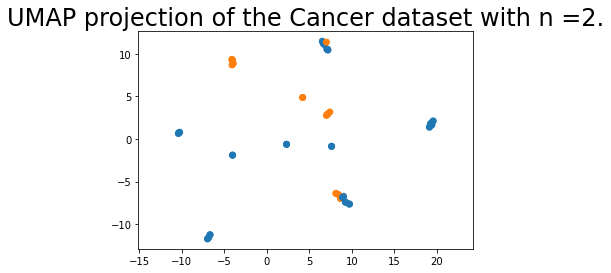

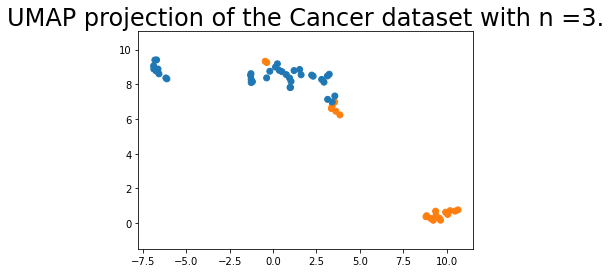

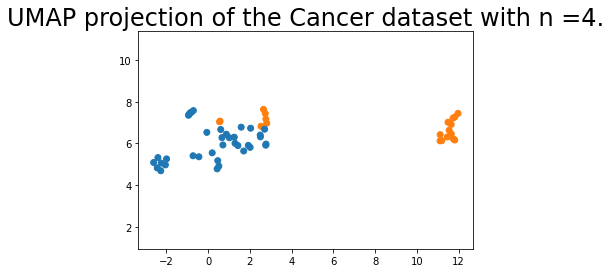

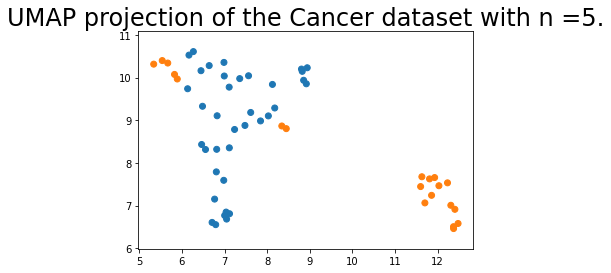

In [ ]:
#@title ❓ Click `Show code` in the code cell to show the solution. { display-mode: "form" }

for n in range(2,6):
# Perform UMAP
  reducer = umap.UMAP(n_neighbors = n, min_dist = 0.01)
  embedding = reducer.fit_transform(scaled_X_train)
  embedding.shape

  # Plot the UMAP
  plt.figure()
  plt.scatter(
      embedding[:, 0],
      embedding[:, 1],
      c=[sns.color_palette()[x] for x in y_train.map({"ALL":0, "AML":1})]
  )
  plt.gca().set_aspect('equal', 'datalim')
  plt.title('UMAP projection of the Cancer dataset with n ={}.'.format(n), fontsize=24)
  plt.show()

# 🏁 Recap

- If you have finished the tasks and have no questions, place the green card on top.
- If you have finished the tasks but would like to discuss the solutions together again, place the yellow card on top.

![](https://www.lokalinfo.ch/fileadmin/news_import/image003_03.jpg)

#### ✍️ PCA

Next, we try fo find if the data shows any clusters using PCA.

- Scale the data with a StandardScaler
- Train and plot a PCA with 2 components
- How many components to You need to explain 90% of the variance in that data

##### ✍️ PCA with $n=2$

In [ ]:
#@title ❓ Click `Show code` in the code cell to show the solution. { display-mode: "form" }

# Loading scaler and PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Scale the data
std_scaler = StandardScaler()
scaled_X_train = std_scaler.fit_transform(X_train)
scaled_X_train

# Fit PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(scaled_X_train)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])


In [ ]:
principalDf.head()

,principal component 1,principal component 2
0,0.504540,-19.903447
1,-1.366533,14.427994
2,0.010920,-16.351911
3,15.564831,-5.797831
4,8.634810,-19.404104


[0.1443762  0.10409165]


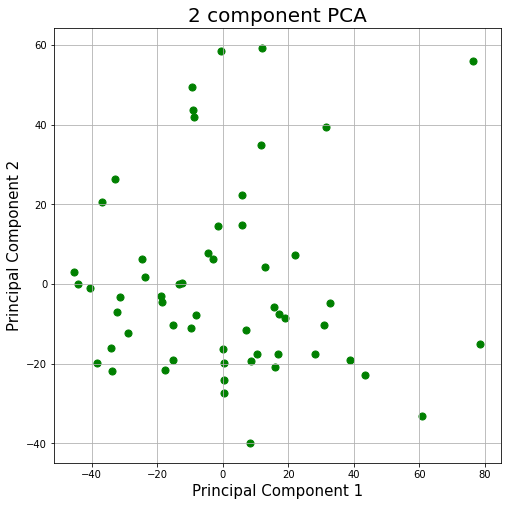

In [ ]:
#@title ❓ Click `Show code` in the code cell to show the solution. { display-mode: "form" }

# Plot the PCA
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

print(pca.explained_variance_ratio_) 

ax.scatter(principalDf['principal component 1']
               , principalDf['principal component 2']
               , c = color
               , s = 50)

ax.grid()

# 🏁 Recap

- If you have finished the tasks and have no questions, place the green card on top.
- If you have finished the tasks but would like to discuss the solutions together again, place the yellow card on top.

![](https://www.lokalinfo.ch/fileadmin/news_import/image003_03.jpg)

##### ✍️ Number of parameters for the PCA

Find the number of principal components, that are needed to cover 90% of the variance.

In [ ]:
#@title ❓ Click `Show code` in the code cell to show the solution. { display-mode: "form" }

# If we omit the n_components, the pca is conducted with several n
pca = PCA()
principalComponents = pca.fit_transform(scaled_X_train)
pca.explained_variance_ratio_ 

array([1.44376196e-01, 1.04091648e-01, 5.62330226e-02, 4.71133934e-02,
       3.73268856e-02, 3.27338573e-02, 2.84322327e-02, 2.77468956e-02,
       2.56601553e-02, 2.27702523e-02, 2.09961526e-02, 2.05338501e-02,
       1.90323328e-02, 1.74317094e-02, 1.68640731e-02, 1.54999861e-02,
       1.54365515e-02, 1.52444406e-02, 1.36088701e-02, 1.34042475e-02,
       1.28131262e-02, 1.25465000e-02, 1.23655786e-02, 1.23229596e-02,
       1.15119440e-02, 1.12711608e-02, 1.10305491e-02, 1.08588945e-02,
       1.01895562e-02, 1.00193236e-02, 9.91648174e-03, 9.65699755e-03,
       9.57890116e-03, 9.47168426e-03, 9.31537856e-03, 9.22680173e-03,
       8.77096484e-03, 8.62950756e-03, 8.28634445e-03, 8.03876927e-03,
       7.91547867e-03, 7.75145867e-03, 7.64626942e-03, 7.32857839e-03,
       7.05914145e-03, 6.64279387e-03, 6.59823812e-03, 6.40679031e-03,
       6.09740195e-03, 5.93640001e-03, 5.55720715e-03, 5.48758448e-03,
       5.16754898e-03, 5.00778626e-03, 4.61672410e-03, 4.42242142e-03,
      

In [ ]:
#@title ❓ Click `Show code` in the code cell to show the solution. { display-mode: "form" }

pca.explained_variance_ratio_.cumsum()
# 38 PCs explain 90% of the variance

array([0.1443762 , 0.24846784, 0.30470087, 0.35181426, 0.38914115,
       0.421875  , 0.45030724, 0.47805413, 0.50371429, 0.52648454,
       0.54748069, 0.56801454, 0.58704687, 0.60447858, 0.62134266,
       0.63684264, 0.65227919, 0.66752364, 0.68113251, 0.69453675,
       0.70734988, 0.71989638, 0.73226196, 0.74458492, 0.75609686,
       0.76736802, 0.77839857, 0.78925747, 0.79944702, 0.80946635,
       0.81938283, 0.82903982, 0.83861873, 0.84809041, 0.85740579,
       0.86663259, 0.87540356, 0.88403306, 0.89231941, 0.90035818,
       0.90827366, 0.91602511, 0.92367138, 0.93099996, 0.9380591 ,
       0.9447019 , 0.95130014, 0.95770693, 0.96380433, 0.96974073,
       0.97529793, 0.98078552, 0.98595307, 0.99096085, 0.99557758,
       1.        , 1.        ])

In [ ]:
#@title ❓ Click `Show code` in the code cell to show the solution. { display-mode: "form" }

pca.explained_variance_ratio_.cumsum()[39]

0.900358176745352

# 🏁 Recap

- If you have finished the tasks and have no questions, place the green card on top.
- If you have finished the tasks but would like to discuss the solutions together again, place the yellow card on top.

![](https://www.lokalinfo.ch/fileadmin/news_import/image003_03.jpg)

#### ✍️ Classifier

- Build a classifier that works with the 38 components You just derived
- Base the model selection on the F1-Score
- Evalute the classifier based on the ROC


In [ ]:
# Create a dataframe, that hold all relevant principal components for the observations on the training set
# this will be your training set
principalDf = pd.DataFrame(data = principalComponents[:,0:40])
principalDf

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.504539,-19.903453,-26.200797,-12.122342,8.978436,-13.727074,-6.372866,9.329570,22.408888,-5.054616,...,6.101201,4.917460,2.958929,8.837604,3.006756,-8.217865,-1.583702,4.105901,0.853118,3.547386
1,-1.366533,14.428002,-12.635530,-0.947898,0.178147,-3.567877,-3.010854,6.432390,-0.013010,3.761998,...,1.532458,5.849922,9.103794,-1.748628,-9.424811,-14.988169,-9.090886,-7.455057,7.331512,9.240095
2,0.010919,-16.351918,-28.734101,-2.360313,14.375937,-4.204955,-6.238977,-0.040043,-4.517262,-5.433373,...,3.429599,-2.411914,4.298056,3.815204,-3.332863,6.175244,2.267047,1.256227,2.216811,-2.934604
3,15.564832,-5.797858,51.779655,12.283498,2.345396,-0.727961,4.479329,0.688347,19.116823,6.811866,...,-12.032101,-2.544412,-8.104007,0.114226,-5.037895,-7.153979,0.068207,2.583399,-1.404903,-0.308114
4,8.634810,-19.404112,-3.282361,1.717398,23.842100,-6.040015,12.210316,8.283945,11.975524,-9.665371,...,9.007780,4.239926,-11.463577,-4.803988,-0.902981,14.285881,3.466184,-17.619974,17.179429,-2.674076
5,-34.117393,-16.015783,24.303776,26.201179,1.505275,18.072398,-0.436487,9.430765,-2.184559,19.961214,...,20.750013,-5.684029,7.334077,8.279615,1.759901,15.539424,6.361547,3.656760,4.675775,0.702070
6,78.645839,-14.995254,-38.799125,63.406065,-41.887918,-2.616831,14.333375,-17.800204,16.283758,-23.589225,...,-3.927090,-1.665660,2.903949,2.830398,3.870150,3.993111,2.369440,2.529477,-1.121602,-0.301244
7,-32.259819,-7.002163,-10.514484,7.504778,10.630044,-0.330252,-7.663179,-12.627826,-0.158010,-7.840614,...,-4.268690,3.748853,-12.449868,-18.195040,-0.976496,-5.448899,-5.987339,-3.168894,2.553143,17.425349
8,16.911420,-17.475444,-0.209457,9.302660,-8.592769,2.367994,12.568032,2.354762,6.837122,-2.945906,...,6.485917,8.199044,1.570300,-7.801364,-9.050196,-8.309371,-2.187794,-11.643640,-5.207975,-0.931152
9,-2.998169,6.205521,-2.284866,-7.029671,-2.343231,-25.807849,8.939029,17.357027,13.133330,-4.506514,...,6.601977,1.321370,2.576336,-1.775104,-6.692402,-5.191837,5.706219,3.996839,-3.255062,-5.427854


In [ ]:
# Optional preprocessing, as some scorers do not work with categorical data
# Here, we decide that the "ALL" cancer class is coded with ohne
y_train_one = pd.get_dummies(y_train)
y_test_one = pd.get_dummies(y_test)
y_train_one["ALL"].head()


patient
39    1
16    1
56    1
30    0
61    0
Name: ALL, dtype: uint8

##### ✍️ Model Creation

For instance, use a KNN classifier and perform a grid search

In [ ]:
#@title ❓ Click `Show code` in the code cell to show the solution. { display-mode: "form" }

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()

#Creating a dictionary of neighbours 
neighbours= {'n_neighbors': np.arange(1, 10)}
knn_cv = GridSearchCV(knn, neighbours,scoring = "f1", cv=5)

#fit model to data
knn_cv.fit(principalDf, y_train_one["ALL"])

#gives the n for the best score
print(knn_cv.best_params_)
print(knn_cv.best_score_)

{'n_neighbors': 1}
0.9555555555555555


##### In-Sample Error

Create the confusion matrix, to show how your model performs on the training data:

In [ ]:
#@title ❓ Click `Show code` in the code cell to show the solution. { display-mode: "form" }

from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, accuracy_score  
knn_std = KNeighborsClassifier(n_neighbors=1)
#fit model to data
knn_std.fit(principalDf, y_train_one["ALL"])
y_predict = knn_std.predict(principalDf)
confusion_matrix(y_train_one["ALL"],y_predict)

array([[20,  0],
       [ 0, 37]])

In [ ]:
#@title ❓ Click `Show code` in the code cell to show the solution. { display-mode: "form" }

from sklearn.metrics import f1_score

f1_score(y_train_one["ALL"],y_predict)

1.0

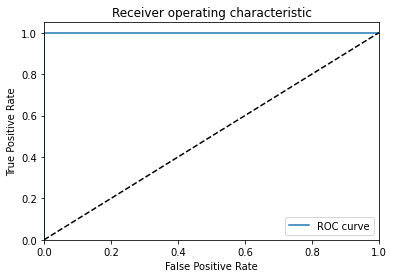

In [ ]:
#@title ❓ Click `Show code` in the code cell to show the solution. { display-mode: "form" }

# import ROC curve
from sklearn.metrics import roc_curve

# create probabilities from knn-classifier
pred_prob1 = knn_std.predict_proba(principalDf)

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_train_one["ALL"], pred_prob1[:,0], pos_label=0)

# Plot the ROC-Curve
plt.figure()
plt.plot(fpr1, tpr1, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

#### ✍️ Model Evaluation

- What is the performance of the classifier on the test set (Confusion matrix, Precision, Recall, AUC)
- make sure, You scaled the test set in the same way and is also uses the same PCs

In [ ]:
#@title ❓ Click `Show code` in the code cell to show the solution. { display-mode: "form" }

# Create the test set
from sklearn.preprocessing import StandardScaler

# Scale the training and test-set
std_scaler = StandardScaler()
scaled_X_train = std_scaler.fit_transform(X_train)
scaled_X_test = std_scaler.transform(X_test)

# Perform the PCA
principalComponents = pca.transform(scaled_X_test)

# Create a DataFrame with the first 40 Principal components
df_principal_test = pd.DataFrame(data = principalComponents[:,0:40])


In [ ]:
df_principal_test.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,41.828695,96.423370,-1.600133,-6.356267,-3.179850,-30.048678,-4.898406,4.594251,-6.472805,5.117396,...,3.398803,1.955676,2.624868,-2.628339,-2.550197,0.476469,1.831726,2.211693,1.011190,-1.563068
1,-22.630884,-10.902550,-7.940387,2.524094,8.966779,6.872059,-4.281941,-1.891611,-3.150066,-6.474849,...,0.219451,-0.864778,-0.344052,0.994655,-1.762377,-0.768175,1.679980,1.495114,0.402266,-2.706537
2,-3.104670,17.114135,9.627263,-18.826432,-13.899100,8.728773,7.945055,14.582379,4.494167,-13.440494,...,2.825834,-0.449974,1.799930,-4.138592,-0.014844,-0.784829,3.141575,0.042935,0.333041,-0.154370
3,-43.983167,0.998102,11.147647,1.528190,-4.653339,2.259114,7.695910,0.207935,-9.385564,-8.745816,...,0.314084,-0.085794,-3.276620,0.404917,-2.137627,-3.331773,1.353384,3.397657,3.576669,-2.459228
4,1.888040,41.722758,9.481207,-3.427765,1.483323,-20.541600,-9.113498,-2.193767,9.356790,-3.844610,...,-1.253209,0.777667,1.371734,1.983366,-0.070025,-2.052947,1.617548,-5.708728,-3.806162,-4.870813


Make a prediction on the test set and plot the confusion matrix:

In [ ]:
#@title ❓ Click `Show code` in the code cell to show the solution. { display-mode: "form" }

# Making a prediction
y_predict = knn_std.predict(df_principal_test)

# Confusion Matrix
confusion_matrix(y_test_one["ALL"],y_predict)


array([[3, 2],
       [2, 8]])

Calculate the F1-score and plot the ROC-Curve

In [ ]:
#@title ❓ Click `Show code` in the code cell to show the solution. { display-mode: "form" }

from sklearn.metrics import f1_score
f1_score(y_test_one["ALL"],y_predict)

0.8000000000000002

Plot the ROC-curve on the test set

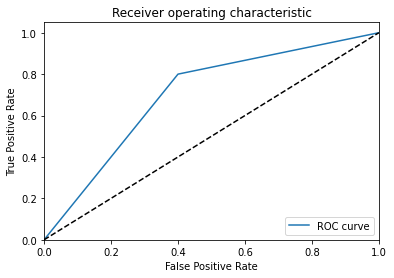

In [ ]:
#@title ❓ Click `Show code` in the code cell to show the solution. { display-mode: "form" }

pred_prob1 = knn_std.predict_proba(df_principal_test)
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label="ALL")
# Pplot the ROC-Curve
plt.figure()
plt.plot(fpr1, tpr1, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

Calculate the AUC:

In [ ]:
# auc scores
from sklearn.metrics import roc_auc_score

auc_score1 = roc_auc_score(y_test, pred_prob1[:,0])
print(auc_score1)

0.7000000000000002


# 🏁 Recap

- If you have finished the tasks and have no questions, place the green card on top.
- If you have finished the tasks but would like to discuss the solutions together again, place the yellow card on top.

![](https://www.lokalinfo.ch/fileadmin/news_import/image003_03.jpg)

🤓 **Bonus Task**

Train another classifier without dimensionalty reduction and compare the results